In [109]:
import parse_sut
import pandas as pd

In [110]:
rating_dict = {
    "name": parse_sut.name,
    "fac": parse_sut.fac,
    "year": parse_sut.year,
    "grade": parse_sut.grade}
rating = pd.DataFrame(rating_dict)

rating.head()

,name,fac,year,grade
0,Загребаева Надежда Михайловна,ИНО,2,5.00000
1,Рубина Анастасия Александровна,ИНО,2,5.00000
2,Николаева Оксана Андреевна,Институт магистратуры,2,5.00000
3,Варламов Павел Андреевич,ИС и Т,2,5.00000
4,Кардаков Фёдор Дмитриевич,ИС и Т,2,5.00000


In [8]:
rating.shape

(7684, 4)

In [10]:
rating.nunique()

name     7662
fac         9
year        5
grade     972
dtype: int64

In [11]:
rating.isnull().sum()

name     0
fac      0
year     0
grade    0
dtype: int64

In [12]:
rating['grade']=rating['grade'].astype('float64')
rating['year']=rating['year'].astype('int')

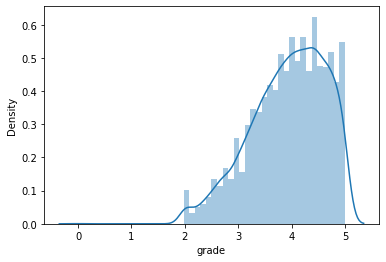

In [49]:
import seaborn as sns
sns.distplot(rating["grade"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


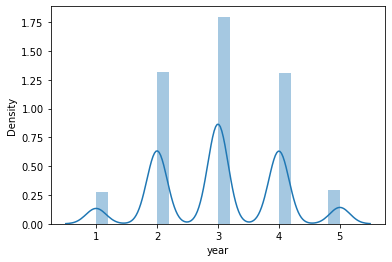

In [15]:
sns.distplot(rating['year'])

Год > 2 потому что 1 курс еще не сдавал сессию 

In [50]:
agg_func = {"grade": ["mean", "median", "std", "var", "mad"]}
rating[rating["year"] > 1].groupby(["year"]).agg(agg_func).round(2)

grade                         
      mean median   std   var   mad
year                               
2     3.94   4.10  0.78  0.61  0.64
3     3.83   3.88  0.71  0.50  0.58
4     4.00   4.06  0.64  0.41  0.53
5     3.99   4.00  0.47  0.22  0.37

Ваш покорный слуга:

In [18]:
rating.loc[rating['name'] == "Александров Фёдор Тарасович"] 

,name,fac,year,grade
609,Александров Фёдор Тарасович,РТС,4,4.84615


Делим строковые значения с именами по разным столбцам для дальнейшей сортировки

In [19]:
rating['surname']=rating["name"].map(lambda x:x.split()[0])
rating['fname']=rating["name"].map(lambda x:x.split()[1])
rating['sname']=rating["name"].map(lambda x:x.split()[2])

rating.head()

,name,fac,year,grade,surname,fname,sname
0,Загребаева Надежда Михайловна,ИНО,2,5.0,Загребаева,Надежда,Михайловна
1,Рубина Анастасия Александровна,ИНО,2,5.0,Рубина,Анастасия,Александровна
2,Николаева Оксана Андреевна,Институт магистратуры,2,5.0,Николаева,Оксана,Андреевна
3,Варламов Павел Андреевич,ИС и Т,2,5.0,Варламов,Павел,Андреевич
4,Кардаков Фёдор Дмитриевич,ИС и Т,2,5.0,Кардаков,Фёдор,Дмитриевич


In [20]:
rating.pop("name")
rating.head()

,fac,year,grade,surname,fname,sname
0,ИНО,2,5.0,Загребаева,Надежда,Михайловна
1,ИНО,2,5.0,Рубина,Анастасия,Александровна
2,Институт магистратуры,2,5.0,Николаева,Оксана,Андреевна
3,ИС и Т,2,5.0,Варламов,Павел,Андреевич
4,ИС и Т,2,5.0,Кардаков,Фёдор,Дмитриевич


Выгружаем в xlsx, сортируем, размечаем данные по полу, загружаем обратно, меняем их тип на int

In [21]:
rating = pd.read_excel("bonch.xlsx")

In [22]:
rating['sex'] = rating["sex"].astype('int')

In [23]:
rating.head()

,fac,year,grade,surname,fname,sname,sex
0,СЦТ,2,5.0,Абиева,Мадина,Тагировна,0
1,ИКСС,4,5.0,Абрамова,Елизавета,Андреевна,0
2,Санкт-Петербургский колледж телекоммуникаций и...,1,5.0,Агалтдинова,Анна,Алексеевна,0
3,ИС и Т,2,5.0,Андреева,Алина,Владиславовна,0
4,ИС и Т,2,5.0,Андреева,Ксения,Алексеевна,0


Общий .count по полам и ввсего студентов:

In [26]:
m_count = rating["sex"][(rating["sex"] == 1)].count()
f_count = rating["sex"][(rating["sex"] == 0)].count()
all_count = rating["sex"].count()

print(m_count, f_count, all_count)

5432 2252 7684


<BarContainer object of 1 artists>

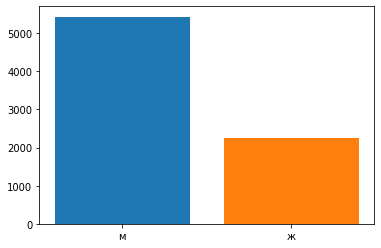

In [62]:
plt.bar(["м"], m_count)
plt.bar(["ж"], f_count)

расчет пропорция

In [27]:
proportion = 100 * round(m_count / all_count, 3)
print("Male value is", proportion, "%")


Male value is 70.7 %


Медианный расчет девочки/мальчики:

In [53]:
rating.groupby(["sex"]).agg(agg_func).round(2)

grade                         
     mean median   std   var   mad
sex                               
0    4.23   4.35  0.59  0.35  0.48
1    3.81   3.87  0.70  0.50  0.58

In [32]:
rating.dtypes

fac         object
year         int64
grade      float64
surname     object
fname       object
sname       object
sex          int64
dtype: object

In [36]:
rating2 = rating[rating['year'] > 1]
rating2.describe()

,year,grade,sex
count,7258.000000,7258.000000,7258.000000
mean,3.124277,3.916682,0.709011
std,0.889662,0.703027,0.454250
min,2.000000,0.000000,0.000000
25%,2.000000,3.444440,0.000000
50%,3.000000,4.000000,1.000000
75%,4.000000,4.470590,1.000000
max,5.000000,5.000000,1.000000


Выбираем студентов старше 1 курса ( 1 курс еще не сдавал сессию => в рейтинге не учитывается

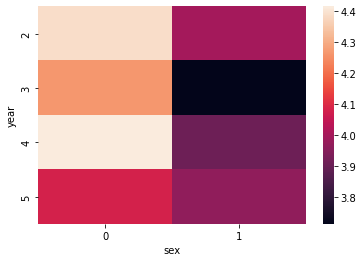

In [38]:
import numpy as np

pivot = rating2.pivot_table(
    index=["year"],
    columns=["sex"],
    values="grade",
    aggfunc=np.median)
sns.heatmap(pivot)

In [96]:
rts_m = rating2[rating2['fac'] == "РТС"]["grade"].median()
econ_m = rating2[rating2['fac'] == "ЦЭУБИ"]["grade"].median()
social_m = rating2[rating2['fac'] == "СЦТ"]["grade"].median()
isit_m = rating2[rating2['fac'] == "ИС и Т"]["grade"].median()
ikss_m = rating2[rating2['fac'] == "ИКСС"]["grade"].median()
ffp_m = rating2[rating2['fac'] == "ФФП"]["grade"].median()
ino_m = rating2[rating2['fac'] == "ИНО"]["grade"].median()
master_m = rating2[rating2['fac'] == "Институт магистратуры"]["grade"].median()
college_m = rating2[rating2['fac'] == "Санкт-Петербургский колледж телекоммуникаций им. Э.Т. Кренкеля"]["grade"].median()


In [106]:
fac_distinct = rating2["fac"].drop_duplicates().values.tolist()

In [104]:
fac_distinct[3] = "Колледж"
medians = map(lambda x:x.round(2), [social_m, ikss_m, isit_m, college_m, ino_m, master_m, rts_m, econ_m, ffp_m])
median_df = pd.DataFrame(medians, fac_distinct)
median_df

,0
СЦТ,4.19
ИКСС,4.00
ИС и Т,4.30
Колледж,4.12
ИНО,3.81
Институт магистратуры,4.67
РТС,3.87
ЦЭУБИ,3.96
ФФП,3.84
